# 손글씨 숫자 데이터 시각화

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## MNIST 데이터 전처리

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)

# 테스트 데이터 중 300개만 선택해서 테스트 데이터로 사용
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300,784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 데이터 정규화
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

## 모델 생성

In [3]:
# 시각화를 위해 3차원 데이터로 인코딩
encoding_dim = 3

# MNIST 데이터를 입력으로 받습니다. (28*28 = 784)
input_img = Input(shape=(784,))
# "encoded"는 3차원으로 축소된 입력값(MNIST) 입니다.
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded"는 MNIST 차원으로 복원된 값입니다.
decoded = Dense(784, activation='sigmoid')(encoded)

# 오토인코더는 입력값과 복원값을 최소화하는 과정을 거칩니다.
autoencoder = Model(input_img, decoded)
# 3차원으로 압축된 값을 받기 위해 인코더를 따로 모델로 생성합니다.
encoder = Model(input_img, encoded)

Metal device set to: Apple M2


2023-10-30 15:39:30.638488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-30 15:39:30.638572: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 모델 학습

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30


2023-10-30 15:39:30.803268: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/469 [..............................] - ETA: 3:01 - loss: 0.6934

2023-10-30 15:39:31.011147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x128x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x128x1x784xi1

469/469 [==============================] - ETA: 0s - loss: 0.3233

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerforman

469/469 [==============================] - 3s 5ms/step - loss: 0.3233 - val_loss: 0.2496
Epoch 2/30
 32/469 [=>............................] - ETA: 2s - loss: 0.2542

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x44x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x44x1x784xi1>'


469/469 [==============================] - 2s 5ms/step - loss: 0.2407 - val_loss: 0.2277
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2308 - val_loss: 0.2218
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2273 - val_loss: 0.2184
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2251 - val_loss: 0.2166
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2235 - val_loss: 0.2145
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2221 - val_loss: 0.2129
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2211 - val_loss: 0.2116
Epoch 9/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2202 - val_loss: 0.2111
Epoch 10/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2194 - val_loss: 0.2103
Epoch 11/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2187 - val_loss: 0.2092
Epoch 12/

In [5]:
# 인코딩된 이미자와 복원된 이미지를 변수로 저장한다.
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

10/10 [==============================] - 0s 3ms/step


2023-10-30 15:40:39.638982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-30 15:40:39.697827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
# 인코딩 이미지 3차원 데이터 확인
encoded_imgs[0]

array([10.802718, 12.033074,  2.051411], dtype=float32)

## 데이터 시각화

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = encoded_imgs[:, 0]
ys = encoded_imgs[:, 1]
zs = encoded_imgs[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

<Figure size 1000x800 with 0 Axes>

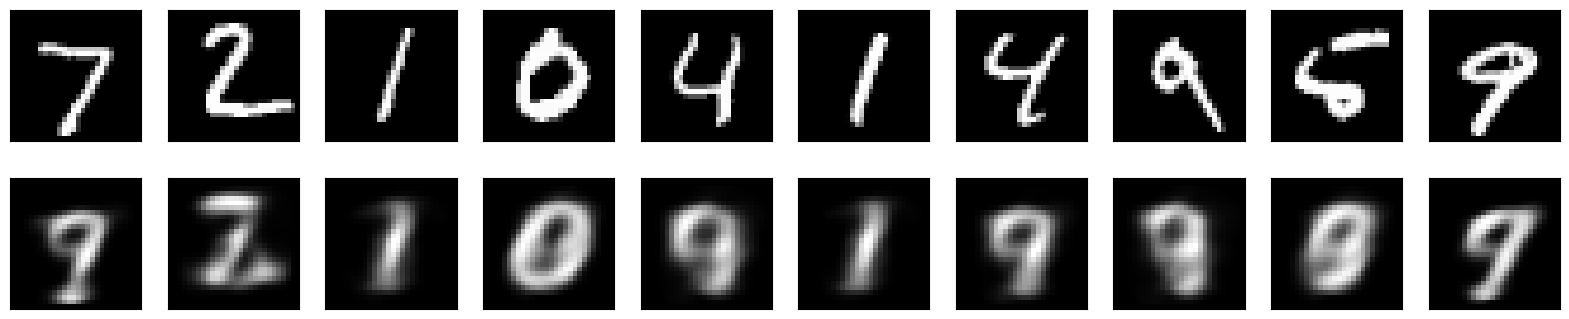

In [8]:
n = 10  # 10개의 이미지를 시각화합니다.
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 시각화
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원 이미지 시각화
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()